### sales prediction 

In [25]:
import pandas as pd
from sklearn.pipeline import Pipeline


In [26]:
df = pd.read_csv('input_datasets/advertising.csv')
df.dropna(inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


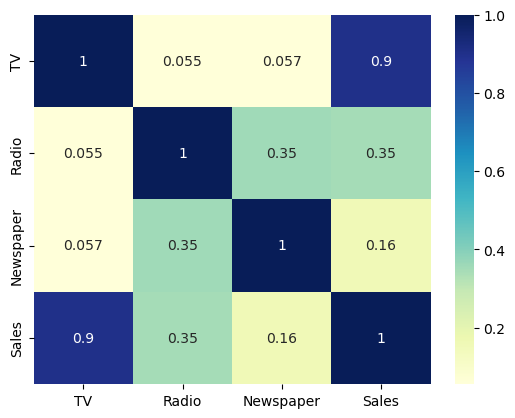

In [27]:
import matplotlib.pyplot  as plt
import seaborn as sns

sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [28]:
# TV and Radio are significant feature for Sales , not Newspaper 
# split dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
X = df[['TV','Radio','Newspaper']] 
Y = df['Sales']

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression,LogisticRegression
m1 = LinearRegression()
m2 = LogisticRegression()

m1.fit(X_train,Y_train)
#m2.fit(X_train,Y_train)



y1_pred = m1.predict(X_test)
error = mean_squared_error(Y_test,y1_pred)
print(error)

r21 = r2_score(Y_test,y1_pred)
print(r21)






2.9077569102710896
0.9059011844150826


In [29]:
from statsmodels.api import OLS


# Fit the model using the training data
lr = OLS(Y_train, X_train)
model = lr.fit()

# Predict using the test data
Y2_pred = model.predict(X_test)

# Calculate and print the mean squared error
error2 = mean_squared_error(Y_test, Y2_pred)
r2 = r2_score(Y_test,Y2_pred)
print(r2)
print(error2)
print(model.summary())

0.7923973555995529
6.415150074882652
                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              2327.
Date:                Wed, 29 May 2024   Prob (F-statistic):                   7.48e-130
Time:                        08:49:31   Log-Likelihood:                         -367.10
No. Observations:                 160   AIC:                                      740.2
Df Residuals:                     157   BIC:                                      749.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----